# Lecture 9


## The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

## Exercise 9.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city)
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$)
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$)
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$)

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator.

### Implementation

I have implemented a Genetic Algorithm to solve the Traveling Salesman Problem. The algorithm runs for 200 generations with a population size of 1000 individuals to find the optimal solution. Each iteration of the algorithm follows these steps:

**Selection**: Initialize a new population vector of size = $\frac{Dim}{2}$ by selecting elements from the previous population. Selection favors elements with smaller distance values.

**Mutation**: Apply the mutation operator $\frac{Dim}{2}$ times to randomly selected individuals from the population. Again, selection biases towards elements with inferior distance.

**Crossover**: Perform crossover operations with a 100% probability over random individuals (with the same . Append the newly generated individuals to the population to maintain its original size.

This process repeats for 200 generations, aiming to converge towards the optimal solution for the Traveling Salesman Problem.

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap

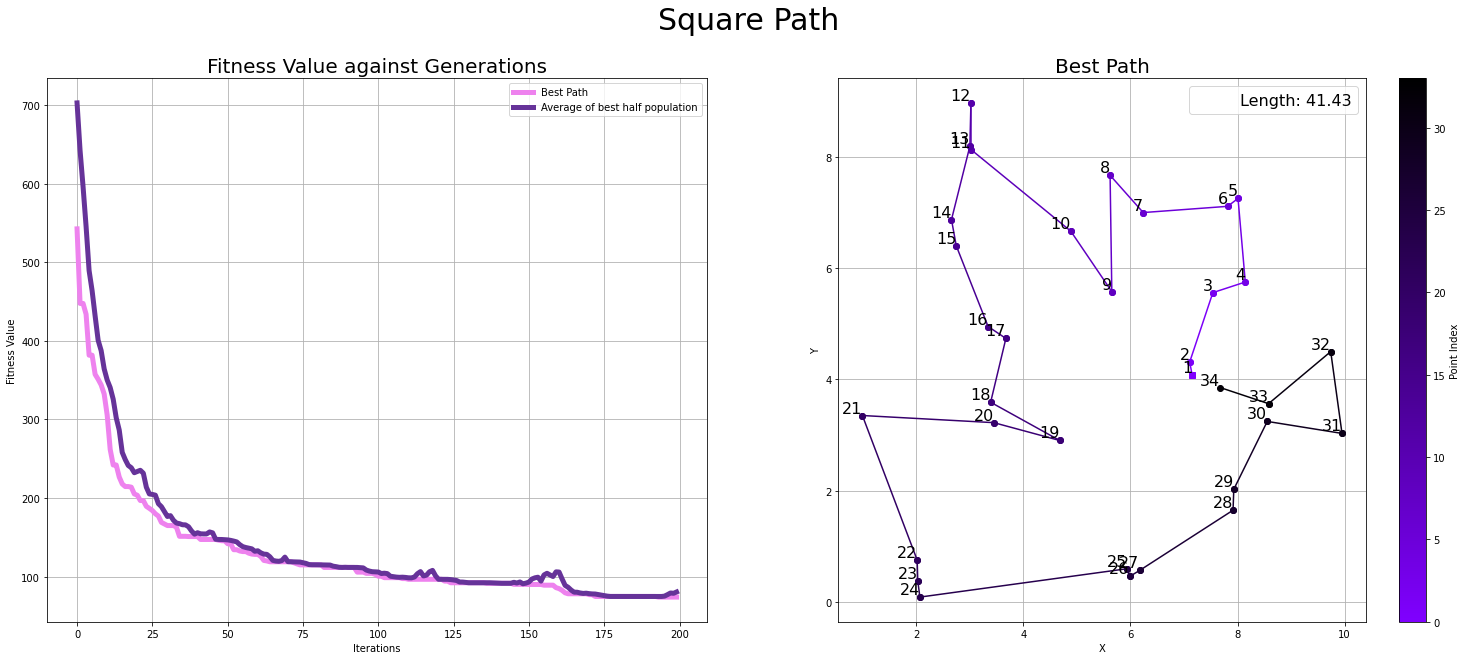

In [3]:
square_avg = np.loadtxt("OUTPUT/Square_Avg_Fitness.txt")
square_best = np.loadtxt("OUTPUT/Square_Best_Fitness.txt")
square_path = np.loadtxt("OUTPUT/Best_Square.txt")

x, y = square_path[:, 0], square_path[:, 1]

# Calculate the total distance of the path
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
total_distance = np.sum(distances) + np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)

plt.figure(figsize=(26, 10))
plt.suptitle("Square Path", fontsize=30)

plt.subplot(1, 2, 1)
plt.plot(square_best[:,0], square_best[:,1], '-', color="violet", label='Best Path', linewidth=5)
plt.plot(square_avg[:,0], square_avg[:,1], '-', color="rebeccapurple", label="Average of best half population", linewidth=5)
plt.title("Fitness Value against Generations", fontsize=20)
plt.ylabel("Fitness Value")
plt.xlabel("Iterations")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
cmap = LinearSegmentedColormap.from_list('darkening', ['#7F00FF', '#000000'])
norm = plt.Normalize(0, len(x) - 1)

for i in range(len(x) - 1):
    if i == 0 or i == len(x) - 1:
        plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(norm(i)), marker='o')
        plt.plot(x[i], y[i], color=cmap(norm(i)), marker='s')
        plt.text(x[i], y[i], str(i+1), fontsize=16, verticalalignment='bottom', horizontalalignment='right')
    else:
        plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(norm(i)), marker='o')
        plt.text(x[i], y[i], str(i+1), fontsize=16, verticalalignment='bottom', horizontalalignment='right')

plt.text(x[-1], y[-1], str(len(x)), fontsize=16, verticalalignment='bottom', horizontalalignment='right')

custom_label = "Length: {:.2f}".format(total_distance)
custom_line = Line2D([0], [1], linestyle="none", marker="", color='none', label=custom_label)
plt.title("Best Path", fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(handles=[custom_line], loc='upper right', fontsize=16)
plt.grid(True)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Point Index')
plt.show()

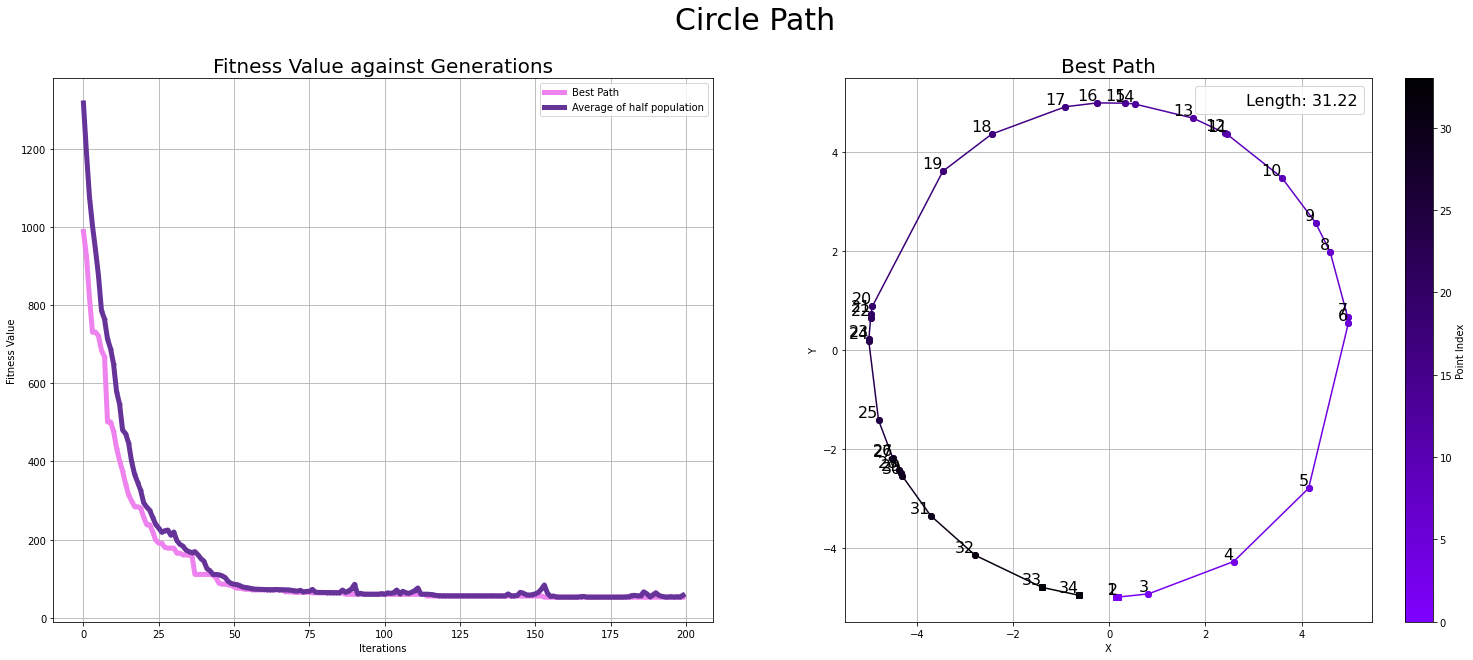

In [4]:
circle_avg = np.loadtxt("OUTPUT/Circle_Avg_Fitness.txt")
circle_best = np.loadtxt("OUTPUT/Circle_Best_Fitness.txt")
circle_path = np.loadtxt("OUTPUT/Best_Circle.txt")

x, y = circle_path[:, 0], circle_path[:, 1]
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
total_distance = np.sum(distances) + np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)

plt.figure(figsize=(26, 10))
plt.suptitle("Circle Path", fontsize=30)
plt.subplot(1, 2, 1)
plt.plot(circle_best[:,0], circle_best[:,1], '.-', color="violet", label='Best Path', linewidth=5)
plt.plot(circle_avg[:,0], circle_avg[:,1], '.-', color="rebeccapurple", label="Average of half population", linewidth=5)
plt.title("Fitness Value against Generations", fontsize=20)
plt.ylabel("Fitness Value")
plt.xlabel("Iterations")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
cmap = LinearSegmentedColormap.from_list('darkening', ['#7F00FF', '#000000'])
norm = plt.Normalize(0, len(x) - 1)

for i in range(len(x)-1):
    if(i == 0 or i == len(x) - 2):
        plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(norm(i)), marker='s')
        plt.text(x[i], y[i], str(i+1), fontsize=16, verticalalignment='bottom', horizontalalignment='right')
    else:
        plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(norm(i)), marker='o')
        plt.text(x[i], y[i], str(i+1), fontsize=16, verticalalignment='bottom', horizontalalignment='right')

plt.text(x[-1], y[-1], str(len(x)), fontsize=16, verticalalignment='bottom', horizontalalignment='right')

custom_label = "Length: {:.2f}".format(total_distance)
custom_line = Line2D([0], [1], linestyle="none", marker="", color='none', label=custom_label)
plt.title("Best Path", fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(handles=[custom_line], loc='upper right', fontsize=16)
plt.grid(True)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Point Index')
plt.show()